In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('Data/Amalgamated_Data_File.csv')

In [3]:
def parse_date(date):
    s = date.split('T')
    d = s[0]
    t = s[1].replace('Z','')
    
    return d

In [4]:
def parse_time(date):
    s = date.split('T')
    d = s[0]
    t = s[1].replace('Z','')
    
    return t

In [5]:
def duration_to_seconds(d):
    # Example time: PT1H16M53S
    
    hours = 0
    minutes = 0
    seconds = 0
    
    d = d.replace('PT','')
    
    h_pts = d.split('H')
    
    if len(h_pts) > 1:
        hours = h_pts[0]
        d = h_pts[1]
        hours = int(hours) * 60 * 60
    
    m_pts = d.split('M')
    
    if len(m_pts) > 1:
        minutes = m_pts[0]
        d = m_pts[1]
        minutes = int(minutes) * 60
    

    if d.replace('S','').isdigit():
        seconds = int(d.replace('S',''))
    
    
    return (hours+minutes+seconds)
    

In [6]:
def long_short(d):
    if d < 664:
        return 'Short'
    return 'Long'

In [7]:
df

,Media_Source,Published_Date,Video_Title,Video_ID,Thumbnail_Default,Thumbnail_Standard,Thumbnail_Max_Res,Views,Likes,Dislikes,Num_Comments,Duration
0,BlazeTV,2021-11-19T16:36:10Z,Rand Paul: Why do Democrats STILL IGNORE risky...,D1qPYh9SQFg,https://i.ytimg.com/vi/D1qPYh9SQFg/default.jpg,https://i.ytimg.com/vi/D1qPYh9SQFg/sddefault.jpg,https://i.ytimg.com/vi/D1qPYh9SQFg/maxresdefau...,10557,1961.0,3.0,285.0,PT12M34S
1,BlazeTV,2021-11-19T00:00:08Z,Room Goes SILENT When Sen. Kennedy Calls Biden...,j_Nkxoqatkg,https://i.ytimg.com/vi/j_Nkxoqatkg/default.jpg,https://i.ytimg.com/vi/j_Nkxoqatkg/sddefault.jpg,https://i.ytimg.com/vi/j_Nkxoqatkg/maxresdefau...,179915,17350.0,119.0,4176.0,PT7M19S
2,BlazeTV,2021-11-18T23:00:10Z,Did MSNBC Go TOO FAR? Rittenhouse Judge Bans N...,xnK1ej1Vk0s,https://i.ytimg.com/vi/xnK1ej1Vk0s/default.jpg,https://i.ytimg.com/vi/xnK1ej1Vk0s/sddefault.jpg,https://i.ytimg.com/vi/xnK1ej1Vk0s/maxresdefau...,41916,3356.0,34.0,455.0,PT44M7S
3,BlazeTV,2021-11-18T21:00:04Z,Lauren Boebert Exposes the Democrats' Disgusti...,4PYu1fjKj5Y,https://i.ytimg.com/vi/4PYu1fjKj5Y/default.jpg,https://i.ytimg.com/vi/4PYu1fjKj5Y/sddefault.jpg,https://i.ytimg.com/vi/4PYu1fjKj5Y/maxresdefau...,23004,3001.0,17.0,268.0,PT4M40S
4,BlazeTV,2021-11-18T20:00:10Z,Is Biden Planning on DUMPING Kamala? | @LevinTV,e6KxYb8t350,https://i.ytimg.com/vi/e6KxYb8t350/default.jpg,https://i.ytimg.com/vi/e6KxYb8t350/sddefault.jpg,https://i.ytimg.com/vi/e6KxYb8t350/maxresdefau...,23106,2234.0,17.0,301.0,PT9M58S
...,...,...,...,...,...,...,...,...,...,...,...,...
87394,PBS,2017-08-16T20:08:04Z,WATCH: VA Sec. Shulkin discusses Veterans Educ...,VwmYkVX8tHI,https://i.ytimg.com/vi/VwmYkVX8tHI/default.jpg,https://i.ytimg.com/vi/VwmYkVX8tHI/sddefault.jpg,https://i.ytimg.com/vi/VwmYkVX8tHI/maxresdefau...,4364,43.0,19.0,NaN,PT9M46S
87395,PBS,2017-08-16T18:58:18Z,WATCH: AG Sessions discusses sanctuary cities ...,8xU7e8SNnsY,https://i.ytimg.com/vi/8xU7e8SNnsY/default.jpg,NaN,NaN,5416,52.0,40.0,NaN,PT26M56S
87396,PBS,2017-08-16T17:22:01Z,Vice President Pence responds to question on P...,P1enMBaZ1mU,https://i.ytimg.com/vi/P1enMBaZ1mU/default.jpg,https://i.ytimg.com/vi/P1enMBaZ1mU/sddefault.jpg,https://i.ytimg.com/vi/P1enMBaZ1mU/maxresdefau...,23386,67.0,233.0,NaN,PT2M6S
87397,PBS,2017-08-16T14:05:55Z,"WATCH: Funeral service for Heather Heyer, who ...",CAoqhV48Avg,https://i.ytimg.com/vi/CAoqhV48Avg/default.jpg,NaN,NaN,24738,213.0,50.0,NaN,PT1H16M53S


In [8]:
df['Published_Date_Time'] = pd.to_datetime(df['Published_Date'])

In [9]:
df['Published_Time'] = df.Published_Date.apply(parse_time)

In [10]:
df['Published_Date'] = pd.to_datetime(df.Published_Date.apply(parse_date))

In [11]:
df['Duration_Seconds'] = df['Duration'].apply(duration_to_seconds)

In [12]:
df['Length_Category'] = df['Duration_Seconds'].apply(long_short)

# Duration and Views

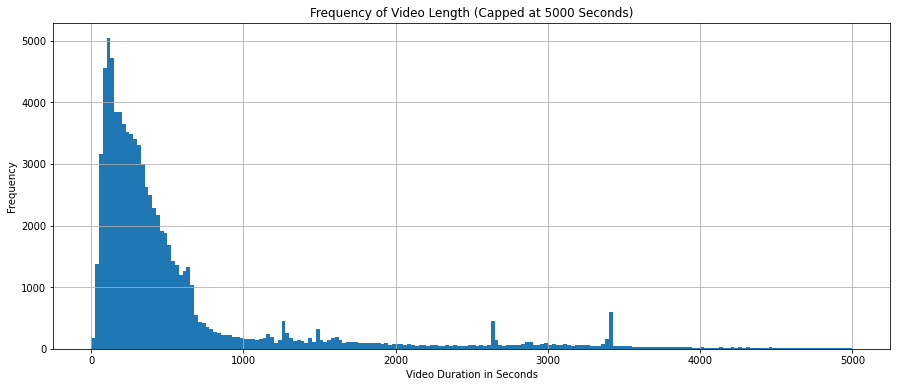

In [13]:
p = df['Duration_Seconds'][df['Duration_Seconds']<5000].hist(bins=200,figsize=(15,6))
p.set_title('Frequency of Video Length (Capped at 5000 Seconds)')
p.set_xlabel('Video Duration in Seconds')
p.set_ylabel('Frequency');

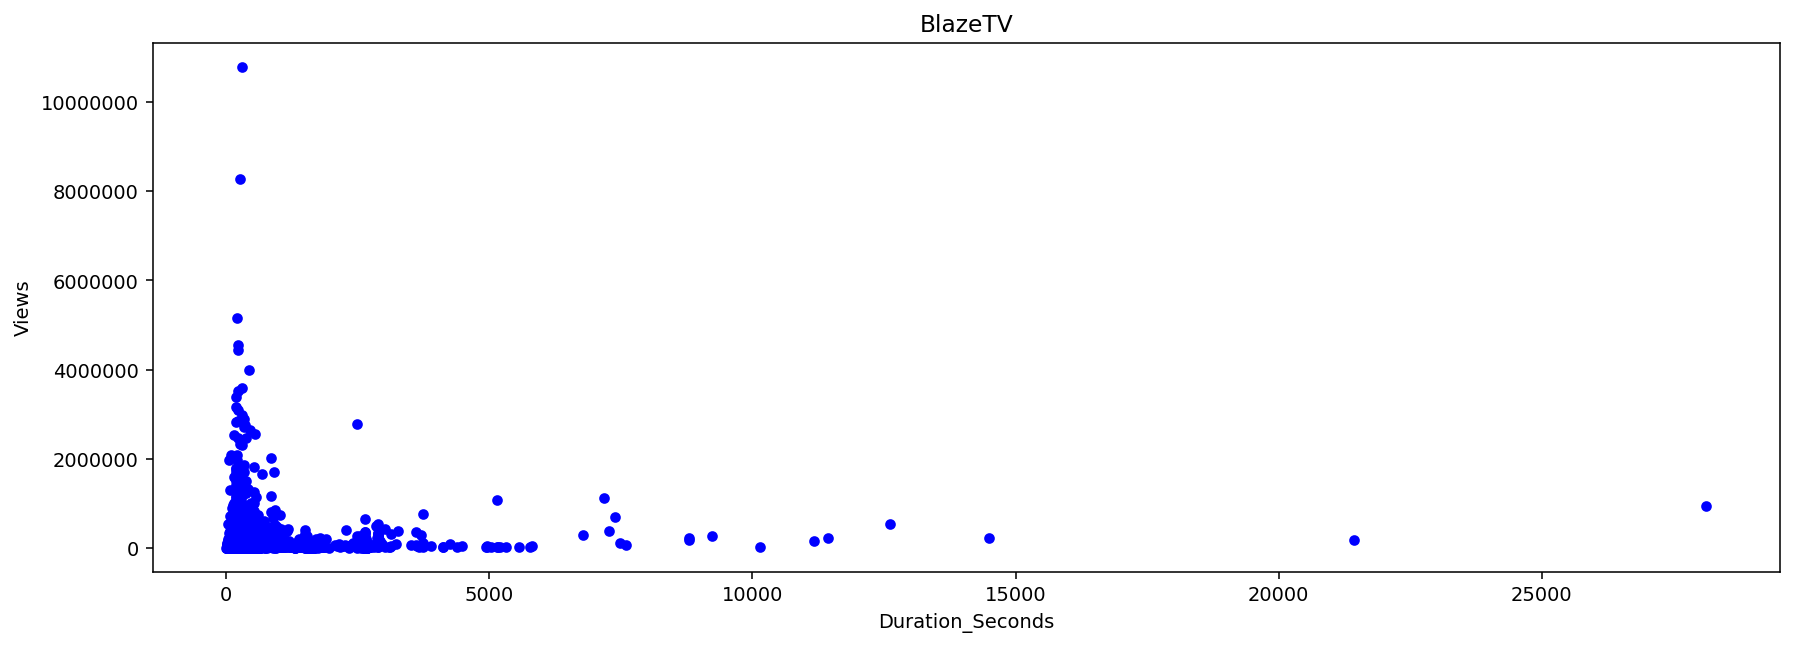

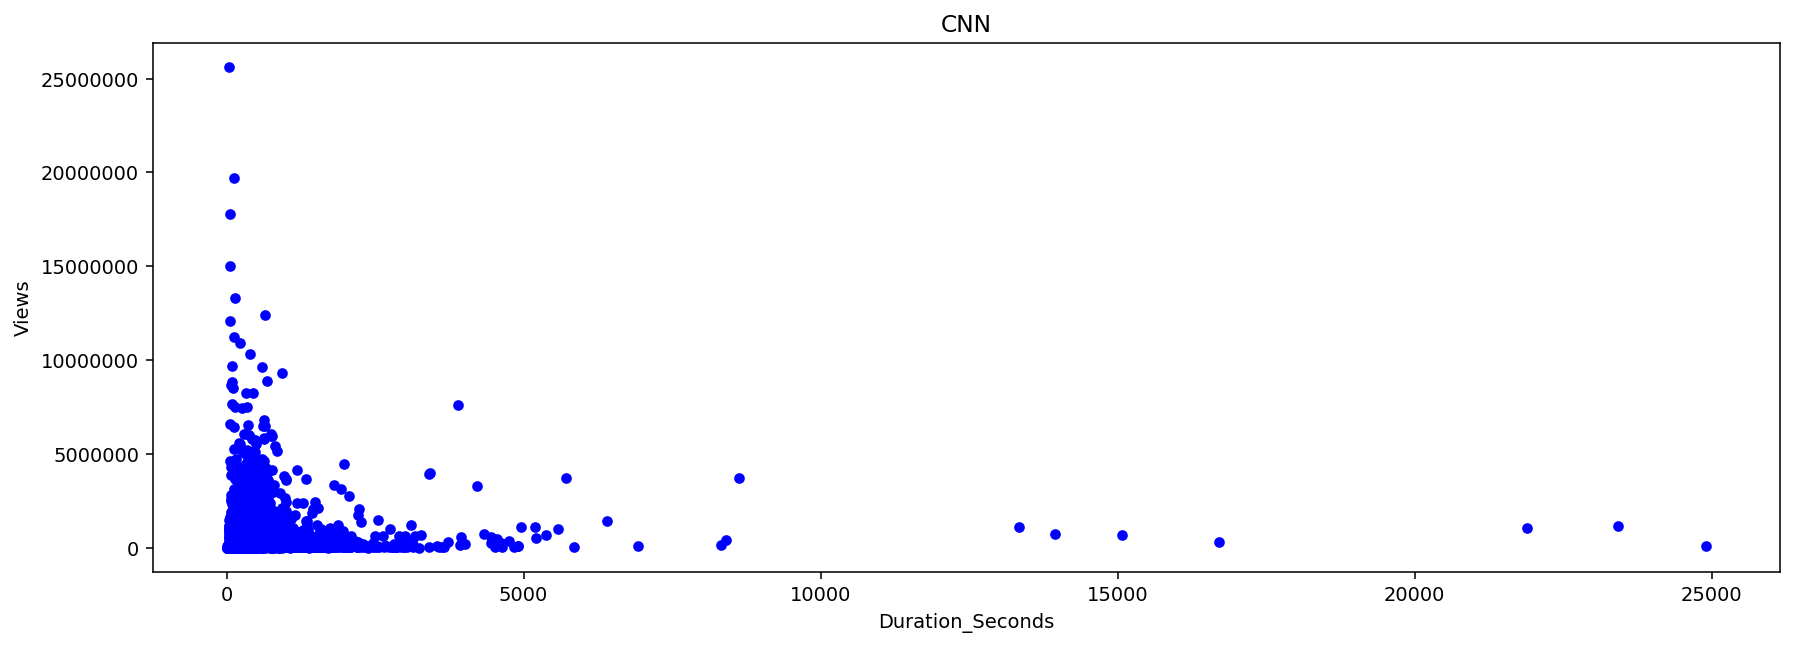

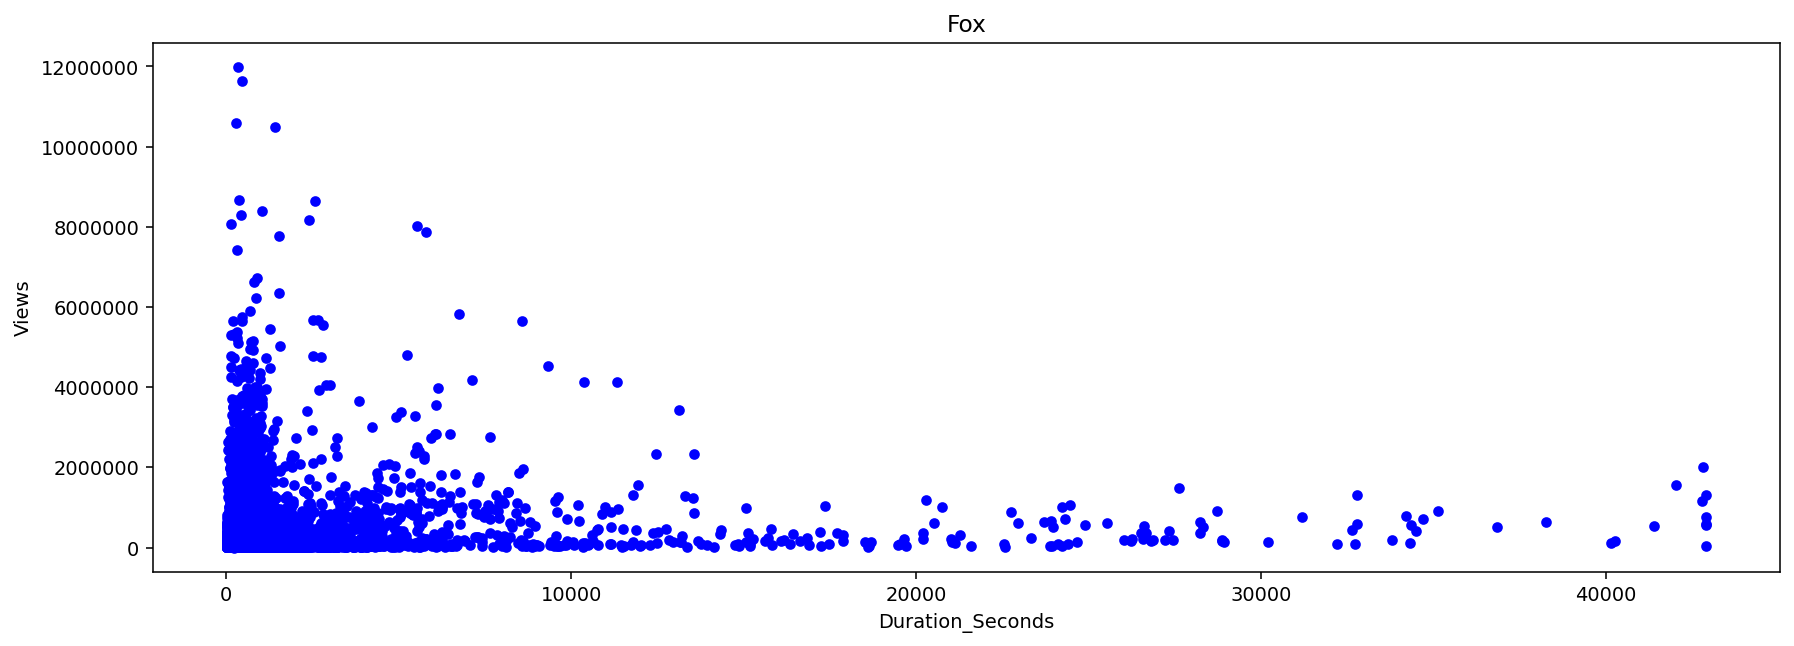

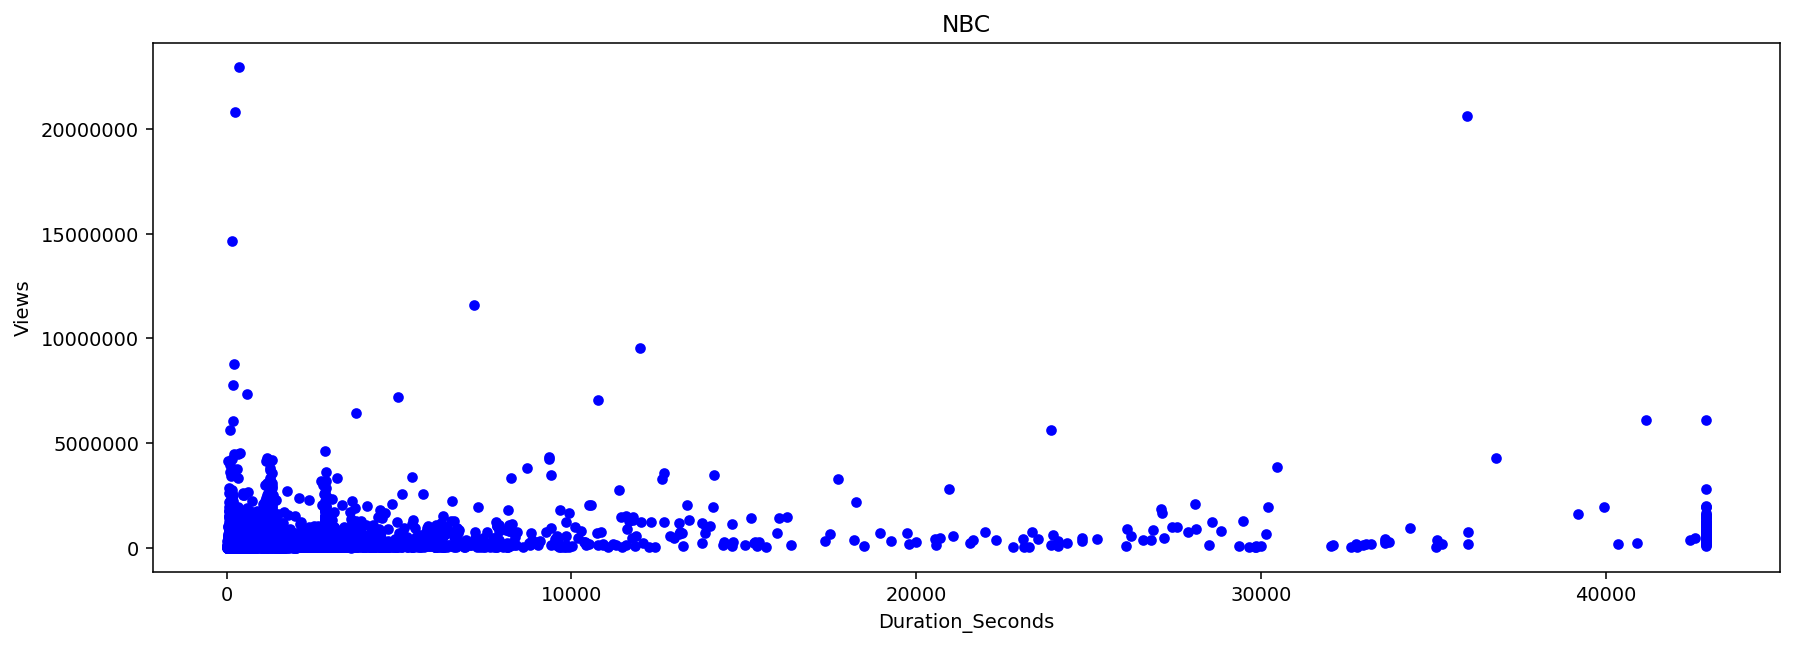

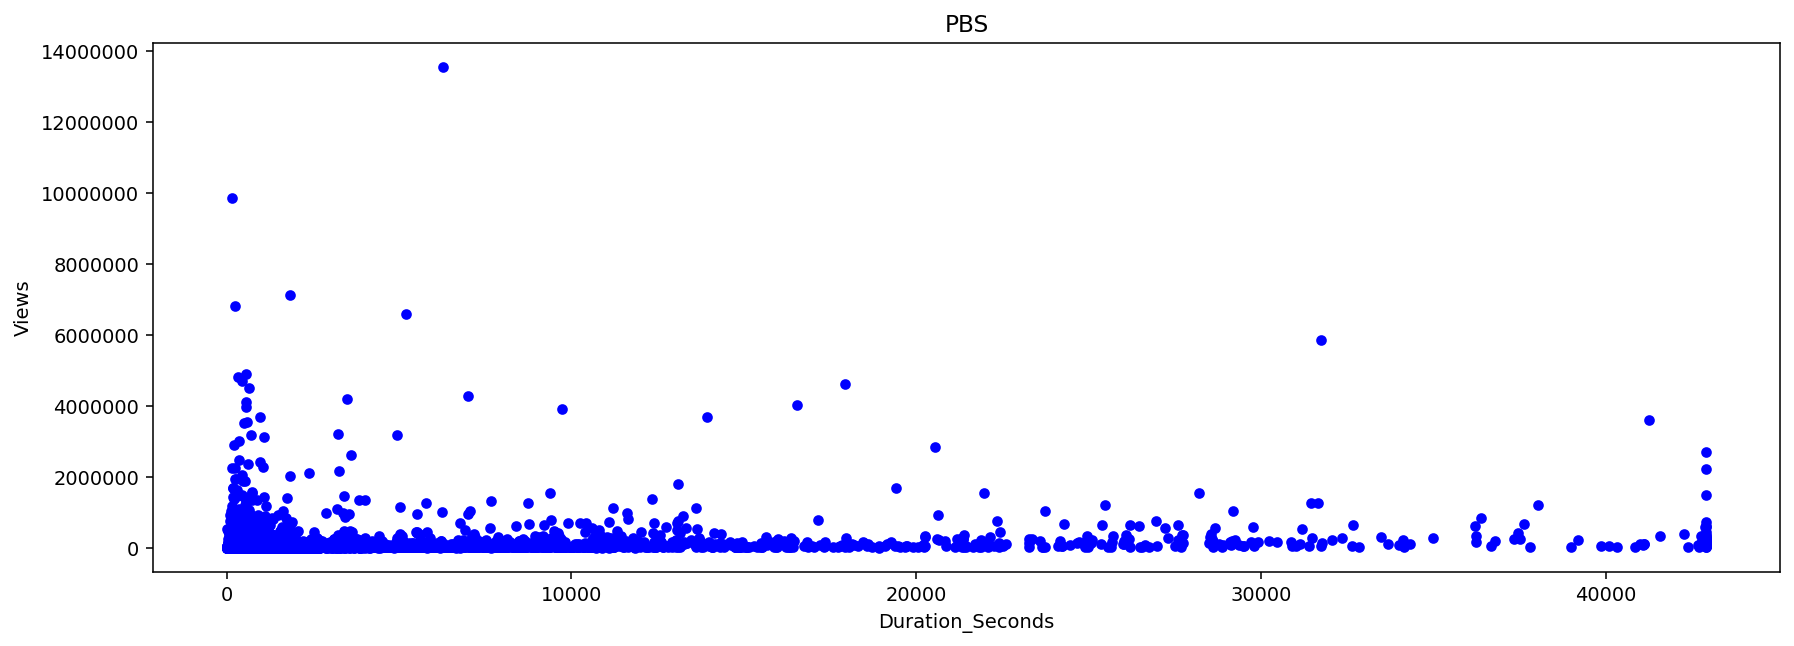

In [14]:
warnings.filterwarnings('ignore')

for title,data in df.groupby(['Media_Source']):
    plt.rcParams["figure.dpi"] = 140
    plt_type = 'scatter'
    
    data.sort_values('Duration_Seconds',inplace=True)
    ax = data.plot(x='Duration_Seconds',y='Views',title=title,figsize=(15,5),color='blue',kind=plt_type)
    ax.ticklabel_format(style='plain')


# Topic Selection

In [15]:
# Covid = topic_search_string = 'COVID|Corona|virus'

# Trump

General_Topic_Name = 'Donald Trump'

topic_search_string = 'Trump'

# Get all related videos
topic = df[df['Video_Title'].str.contains(topic_search_string, case=False, regex=True)]

# Filter by date range
# topic = topic[(topic['Published_Date'] >= '2020-01-01') & (topic['Published_Date'] <= '2021-12-31')]


# Views Over Time

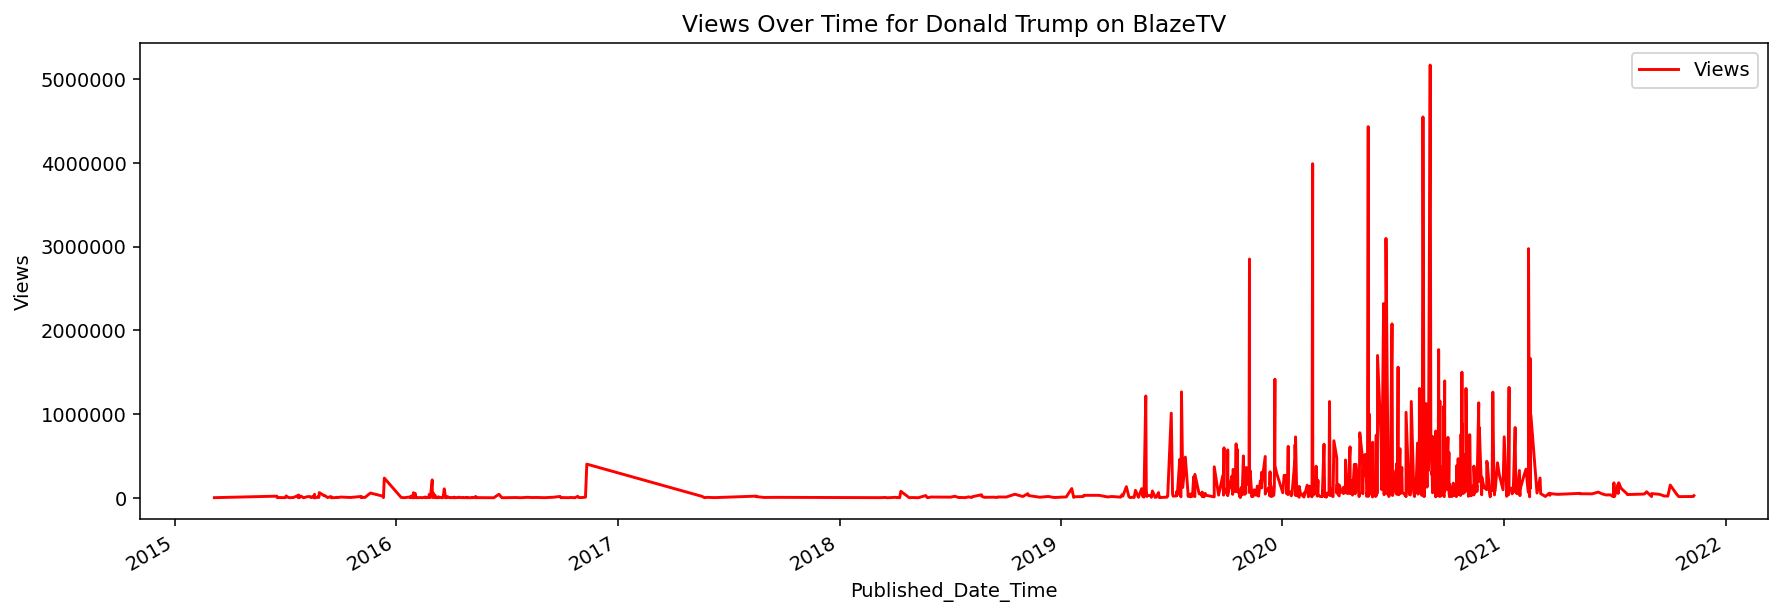

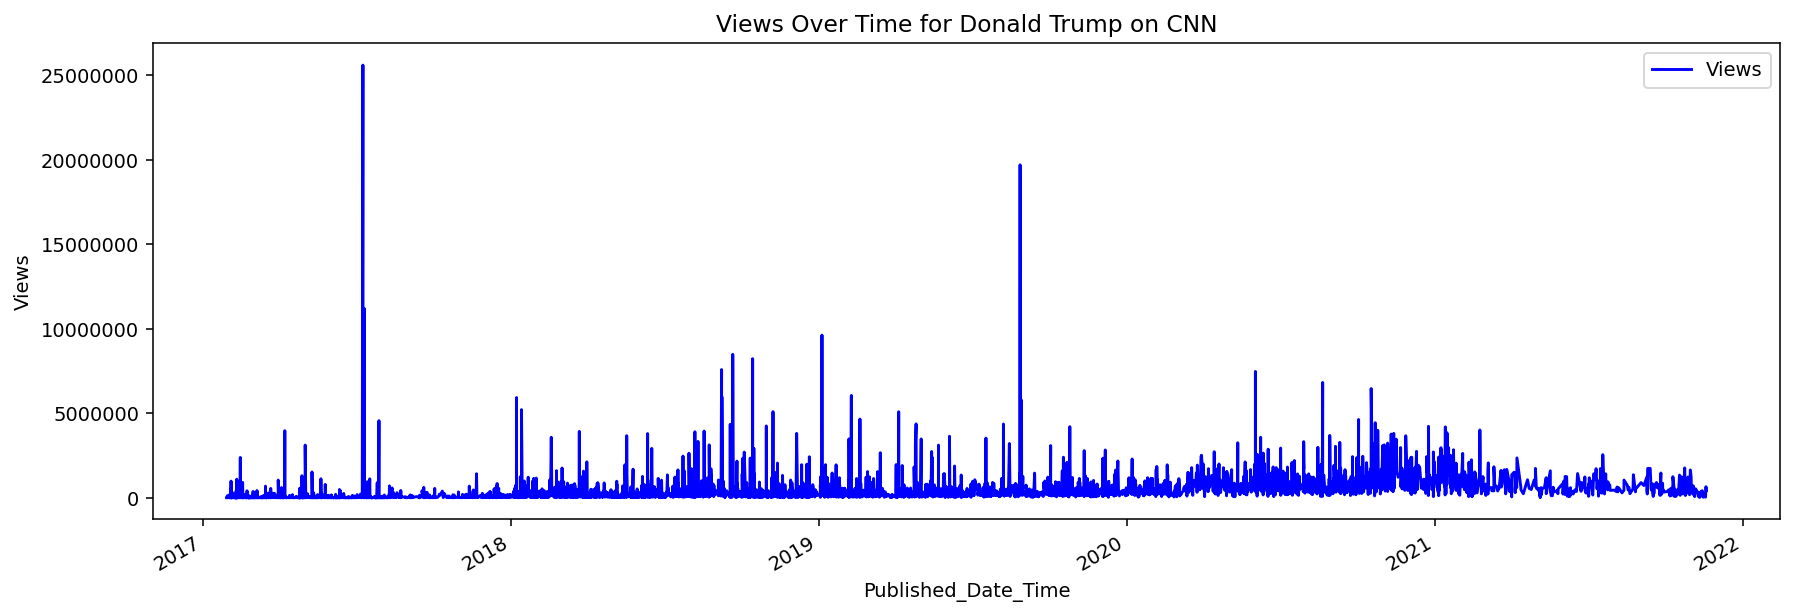

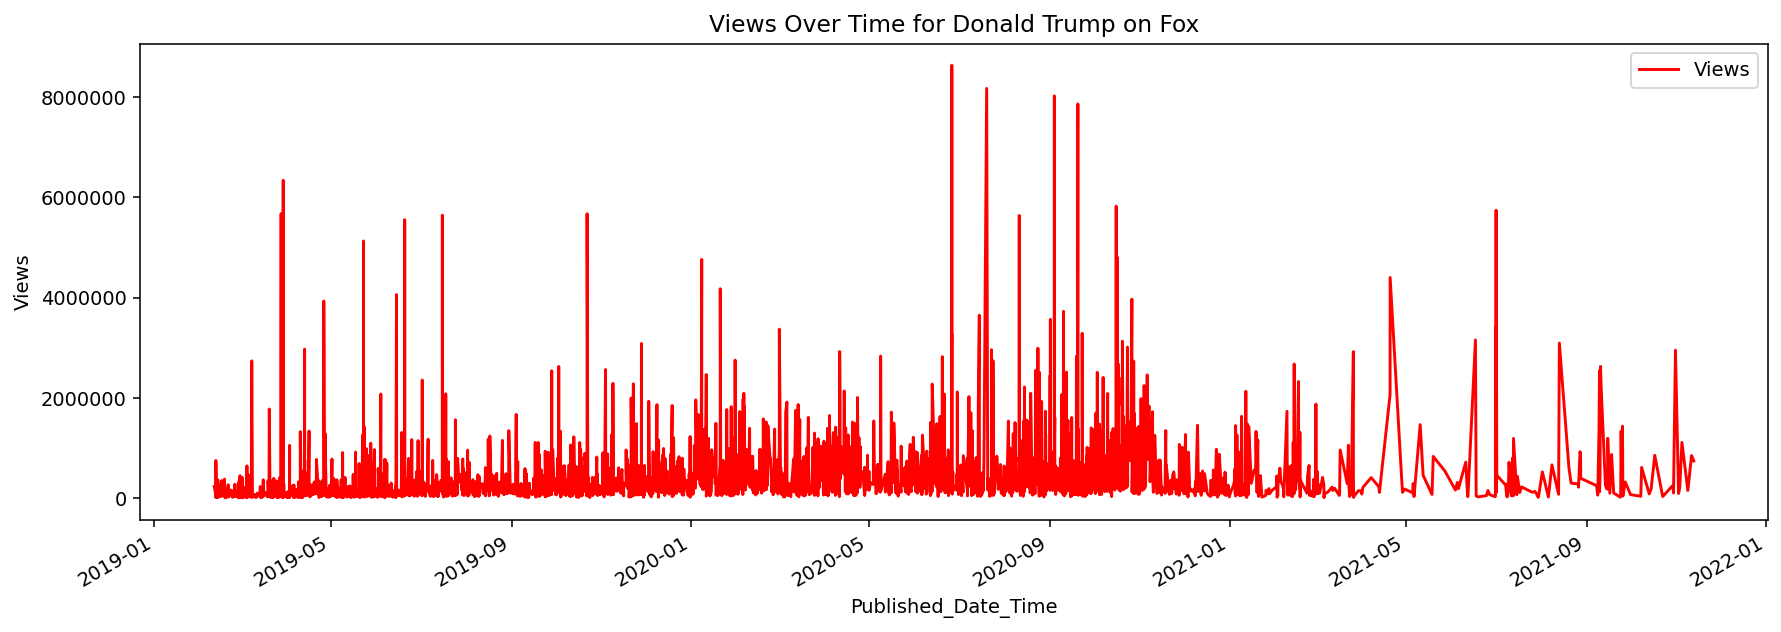

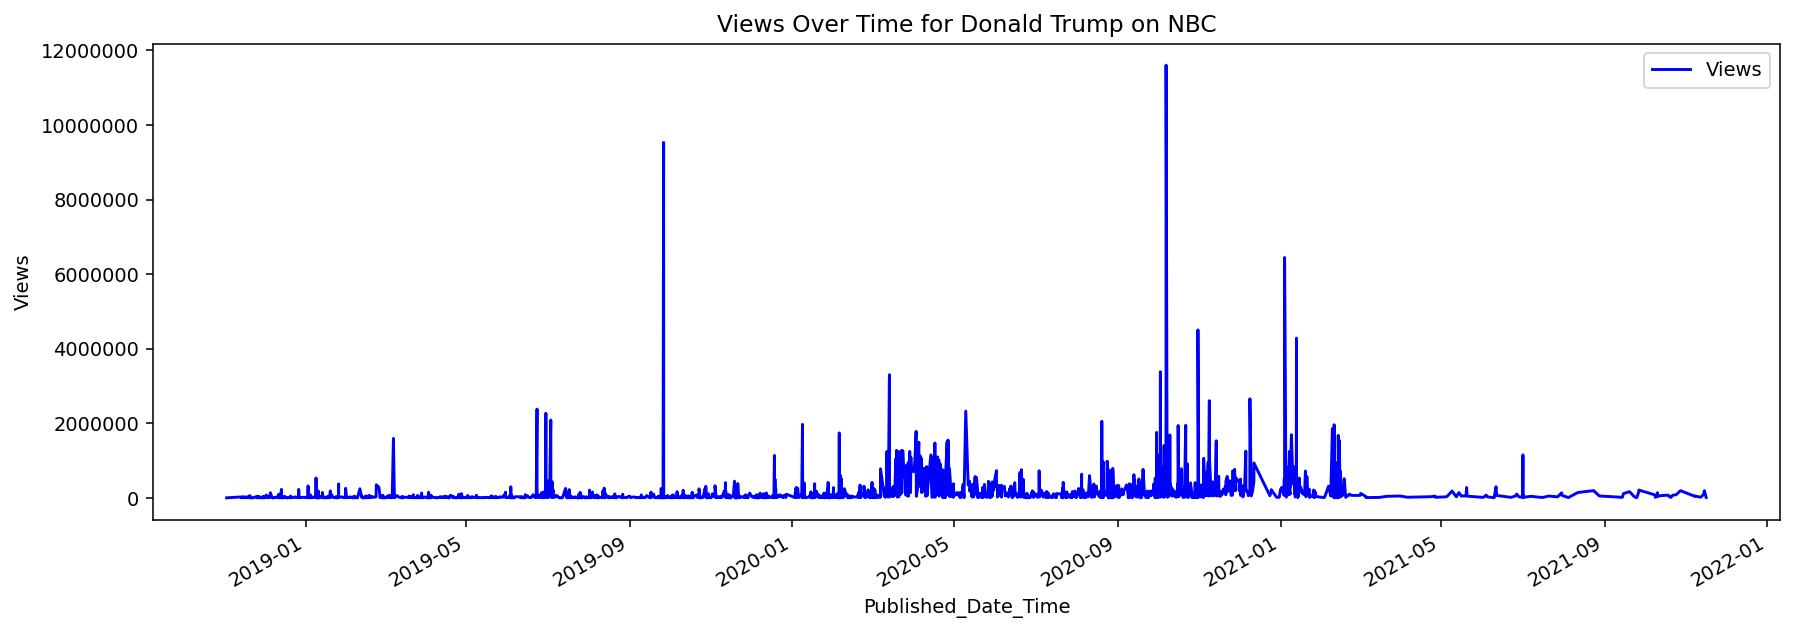

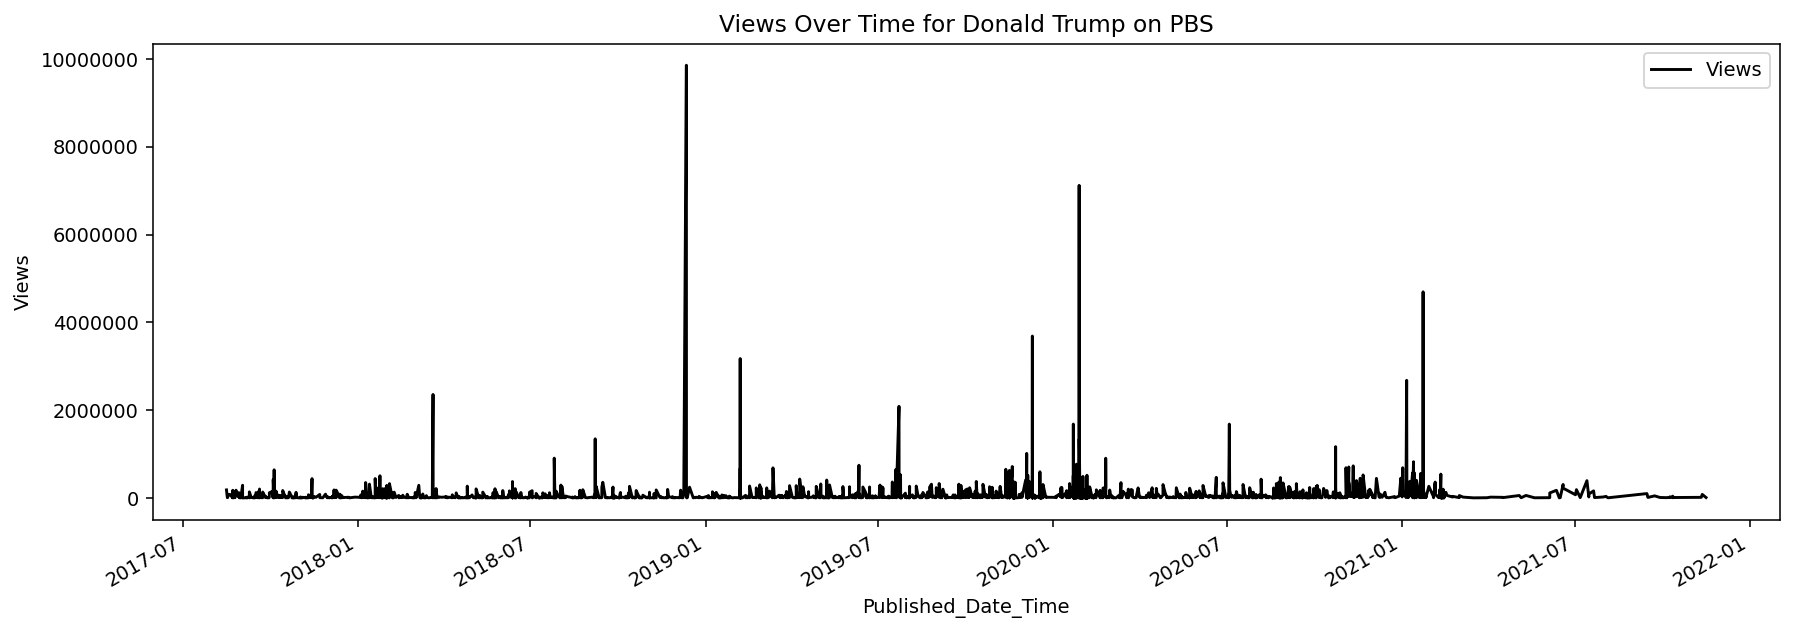

In [16]:
warnings.filterwarnings('ignore')

c = 0

for title, data in topic.groupby('Media_Source'):
    
    plt.rcParams["figure.dpi"] = 140
    plt_type = 'line'

    color = ['red','blue','red','blue','black']
    data.sort_values(['Published_Date_Time'],inplace=True)
    ax = data.plot(x='Published_Date_Time',y='Views',figsize=(15,5),color=color[c],kind=plt_type)
    ax.ticklabel_format(axis='y',style='plain')
    ax.title.set_text(f'Views Over Time for {General_Topic_Name} on {title}')
    ax.set_ylabel('Views')
    
    c += 1
    

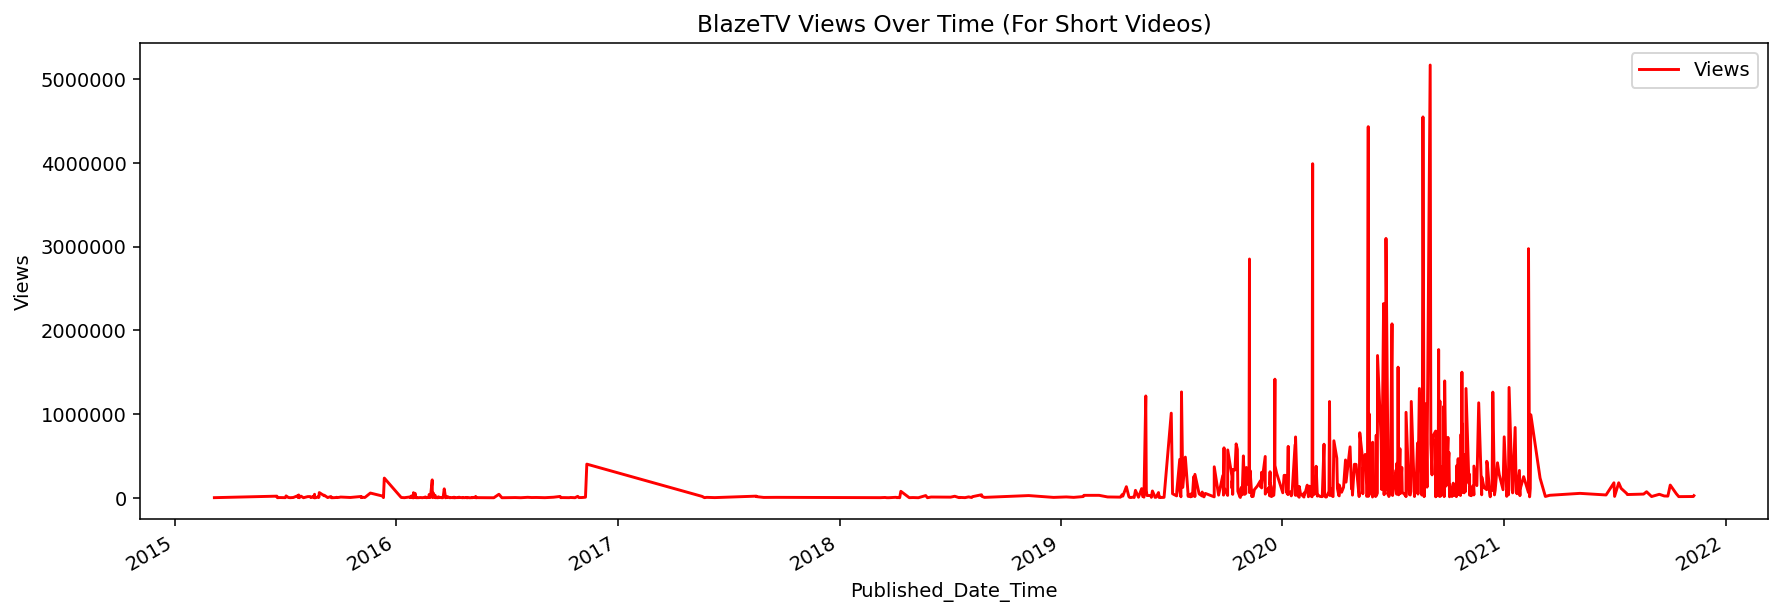

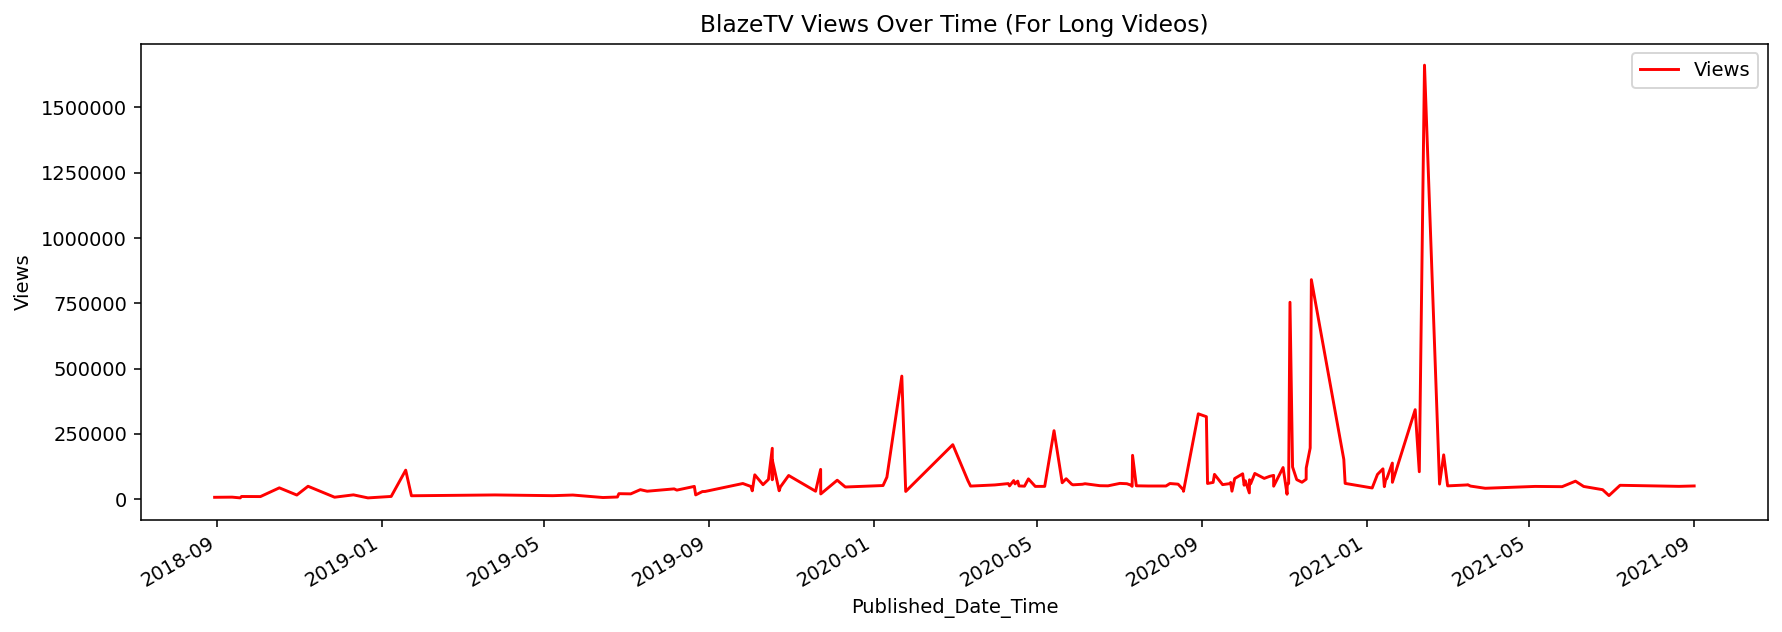

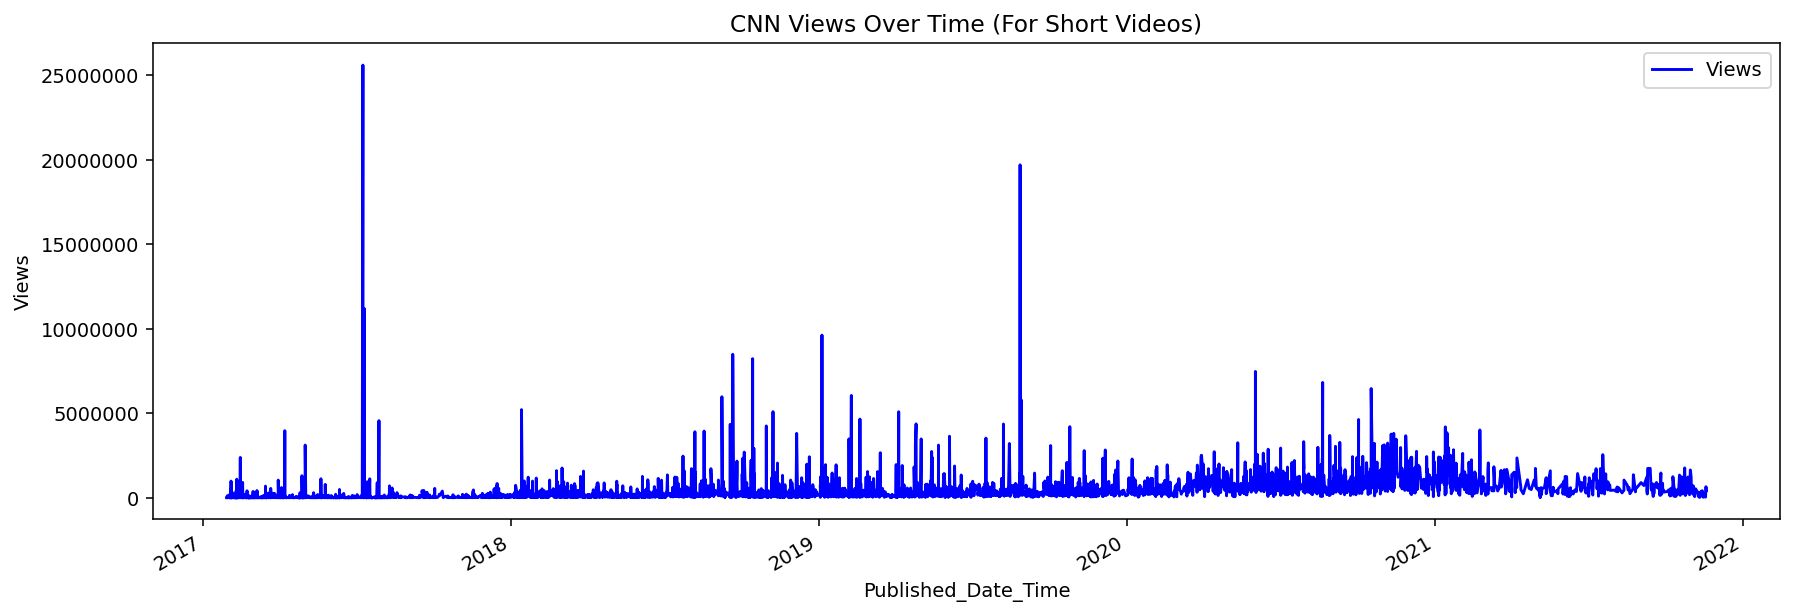

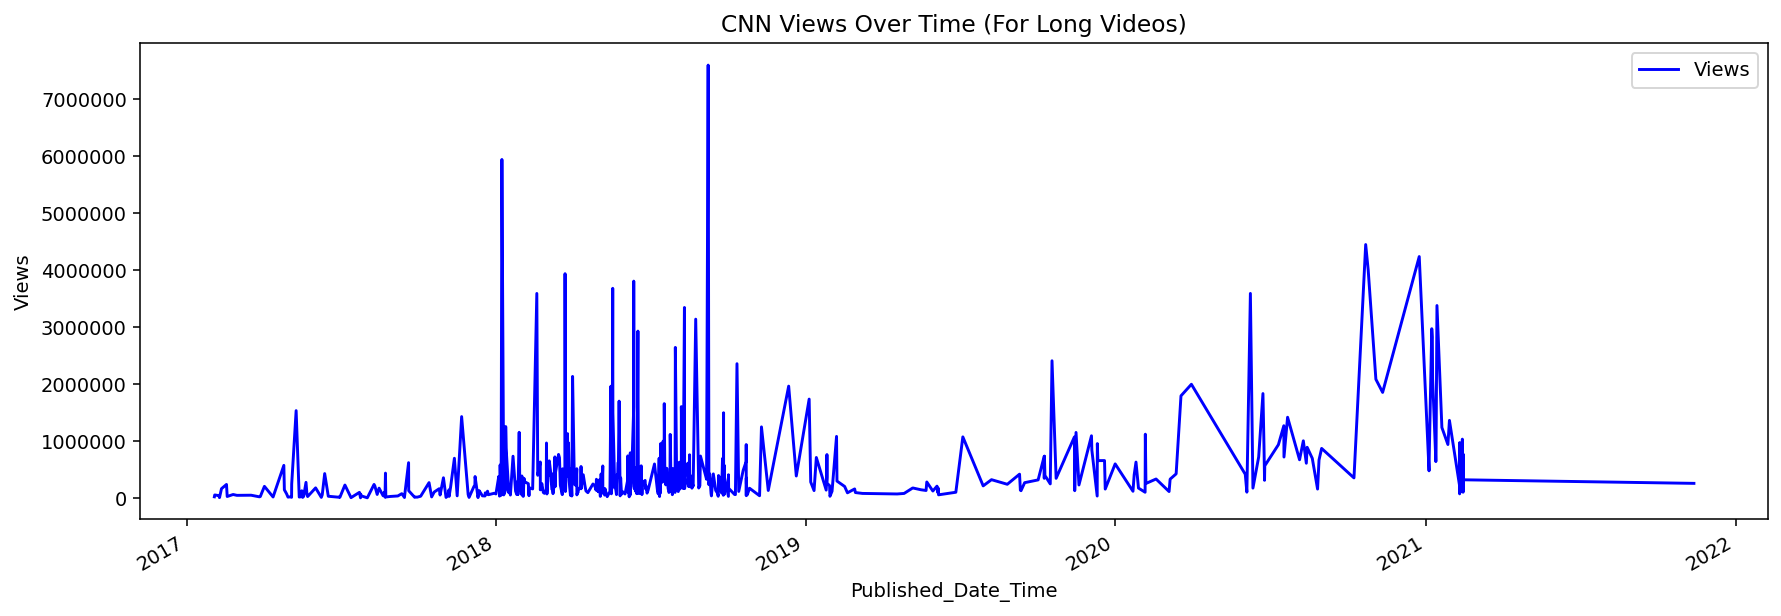

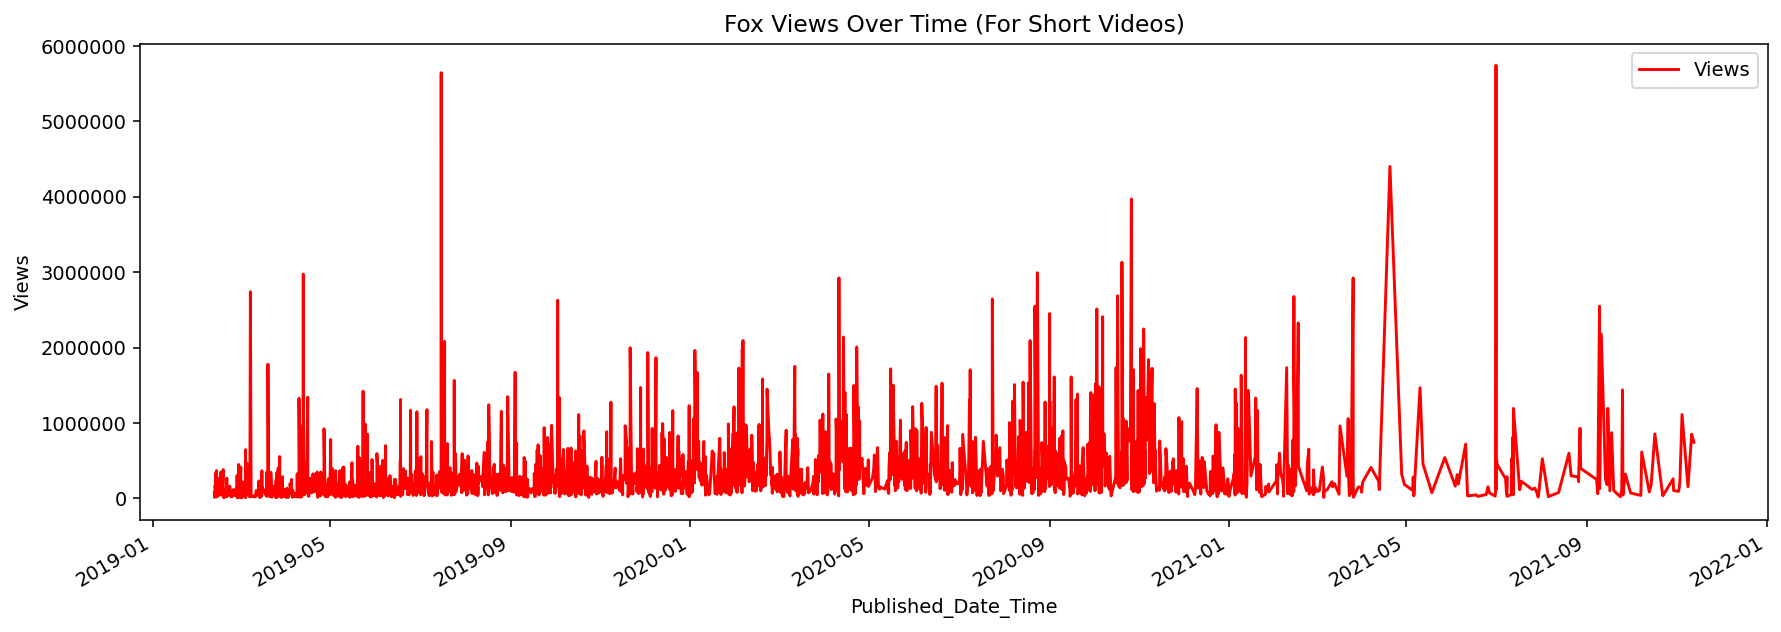

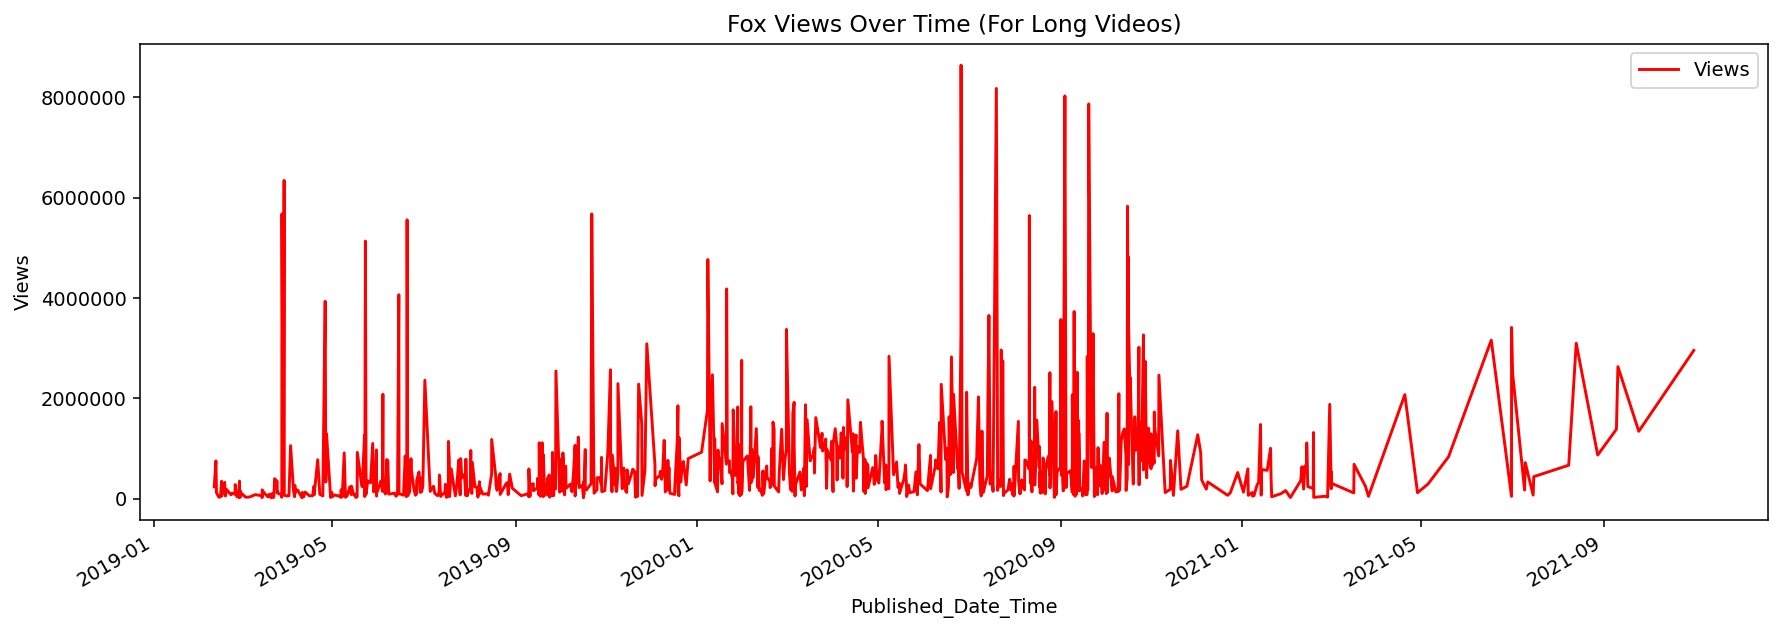

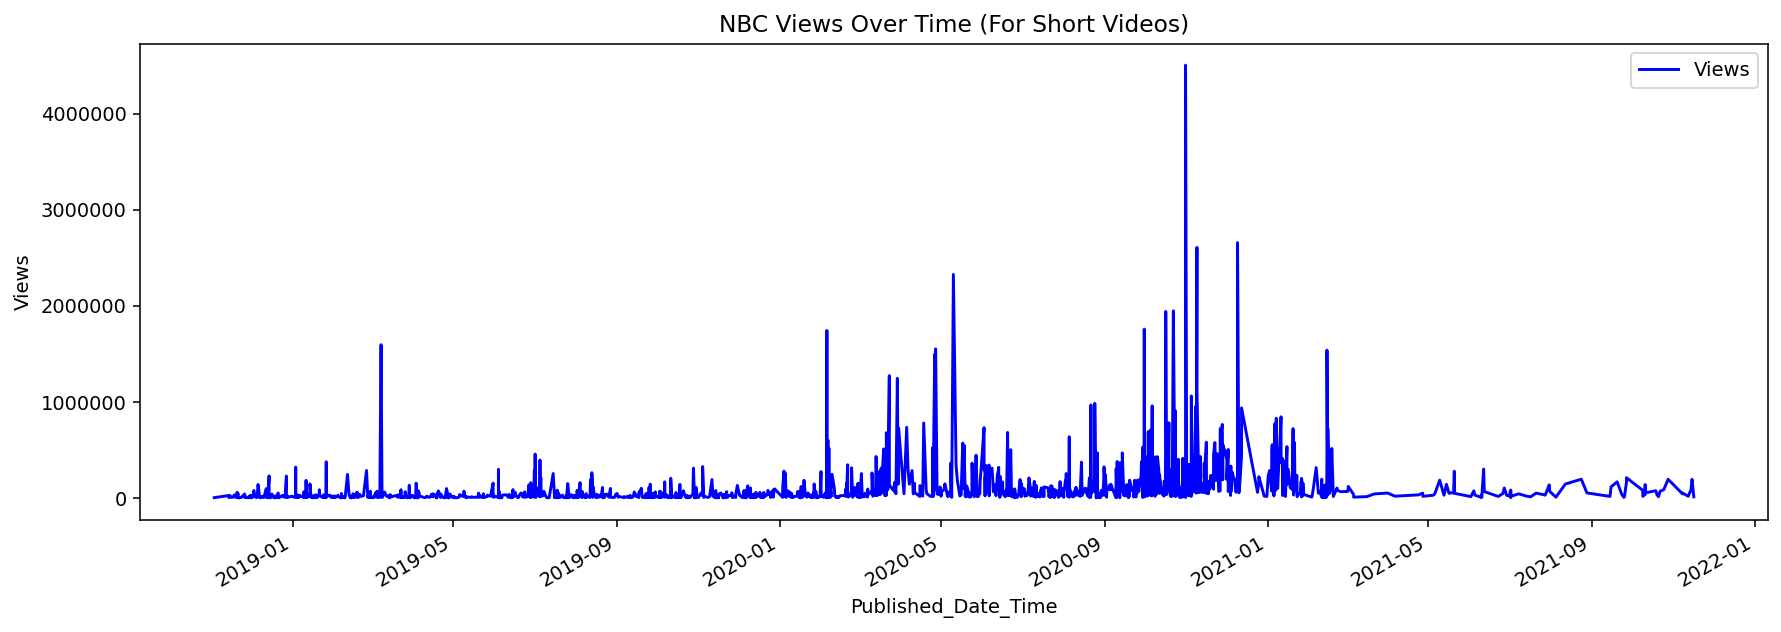

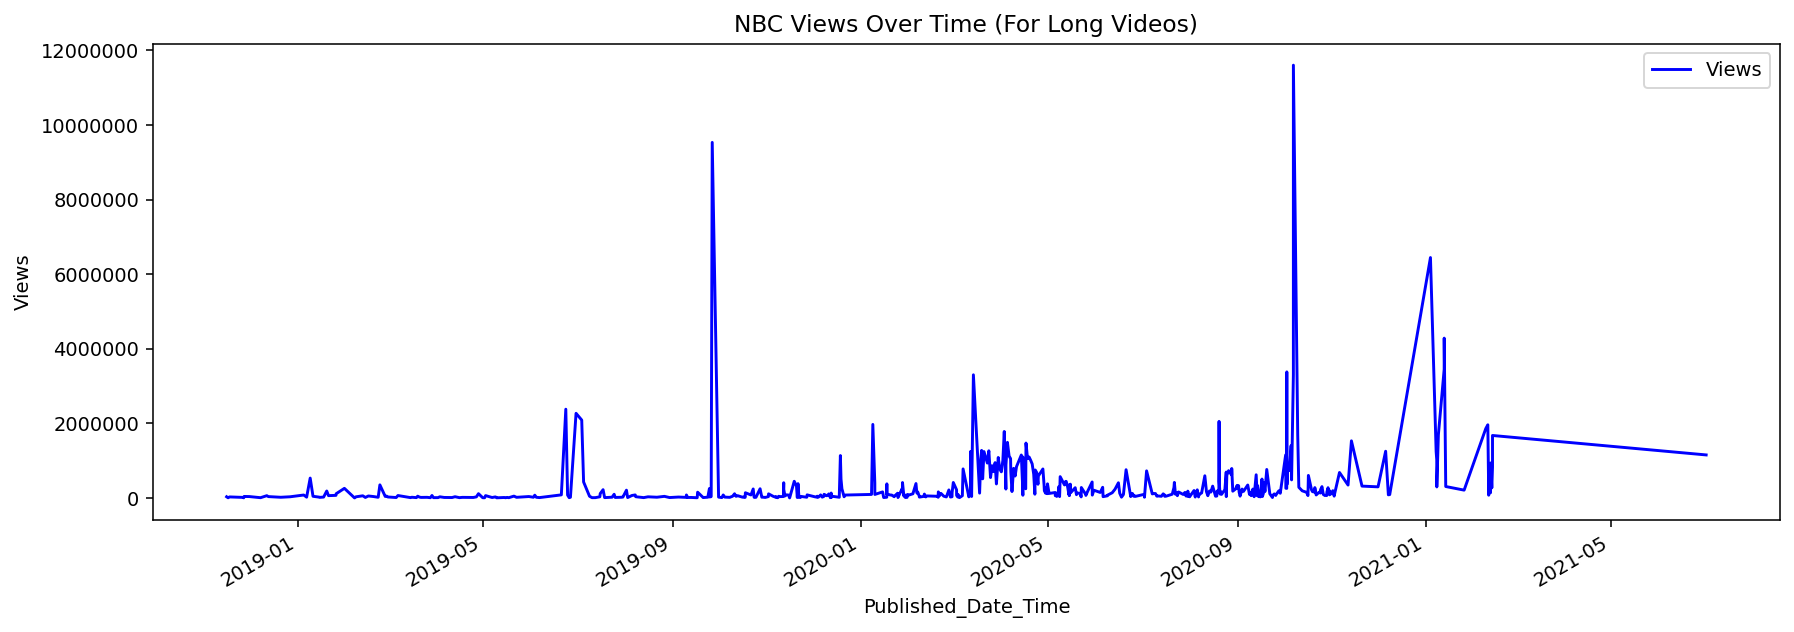

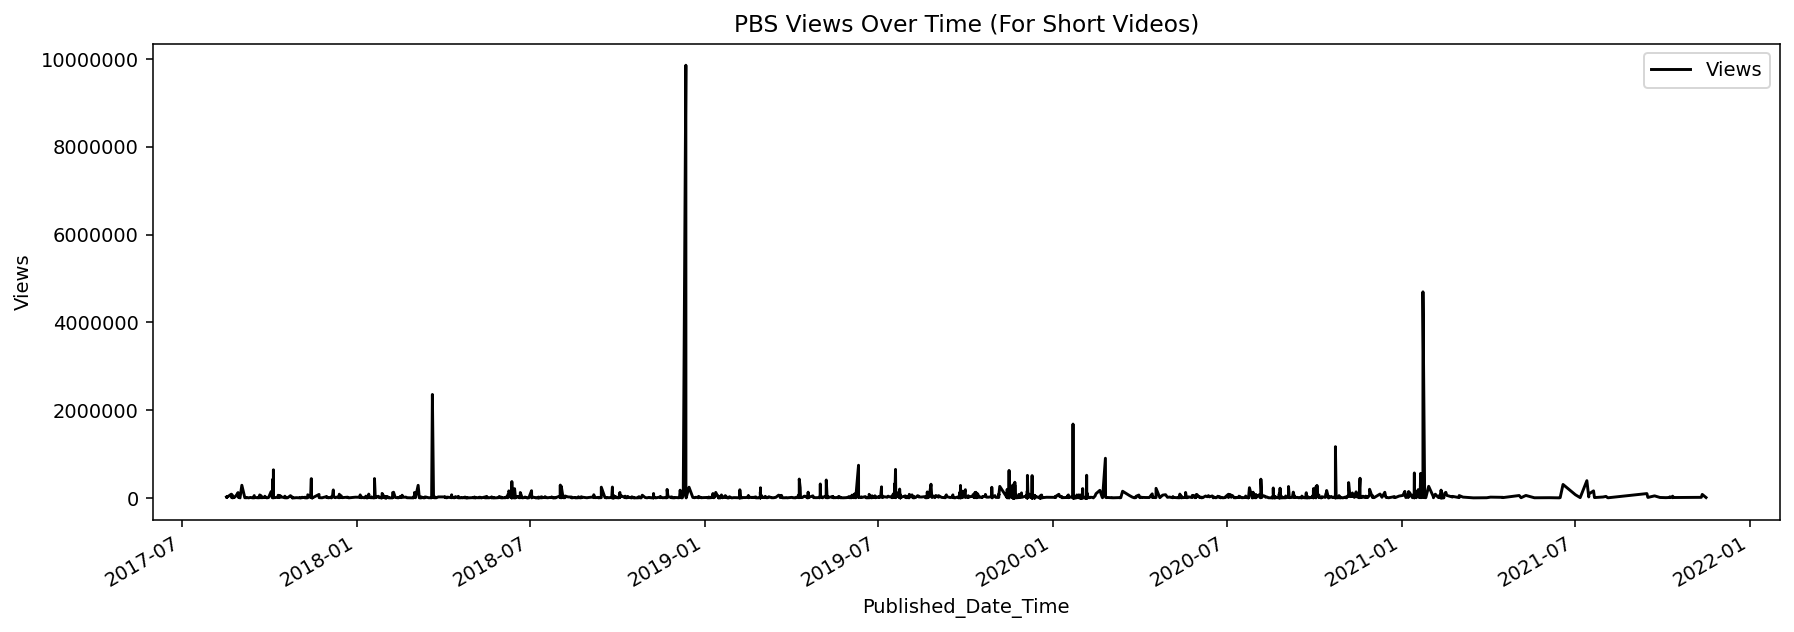

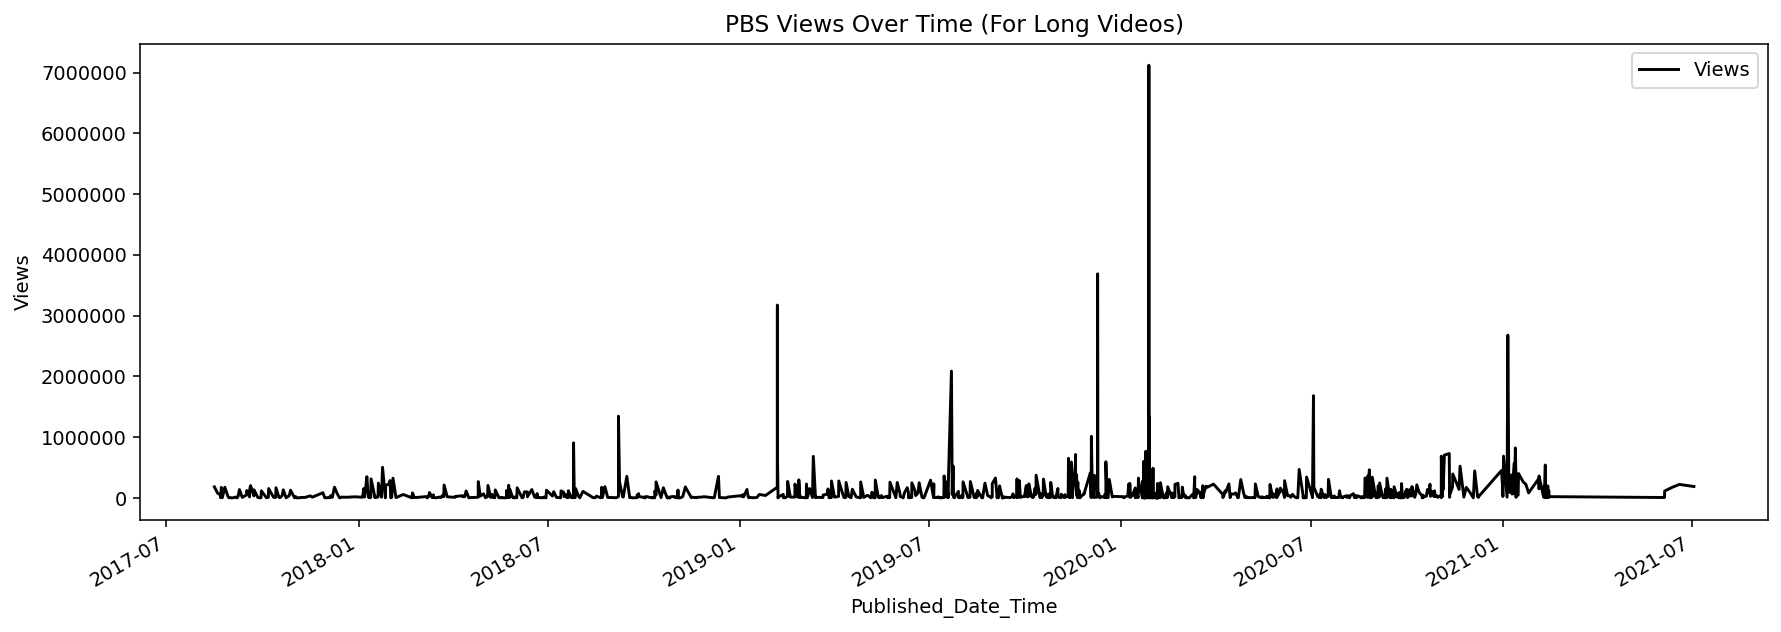

In [17]:
warnings.filterwarnings('ignore')

c = 0

for media_source, data in topic.groupby('Media_Source'):
    
    plt.rcParams["figure.dpi"] = 140
    plt_type = 'line'
    color = ['red','blue','red','blue','black']

    short_videos = data[data['Length_Category']=='Short']
    short_len = len(short_videos)
    
    short_videos.sort_values(['Published_Date_Time'],inplace=True)
    
    ax = short_videos.plot(x='Published_Date_Time',y='Views',figsize=(15,5),color=color[c],kind=plt_type)
    ax.ticklabel_format(axis='y',style='plain')
    ax.title.set_text(f'{media_source} Views Over Time (For Short Videos)')
    ax.set_ylabel('Views')
    
    long_videos = data[data['Length_Category']=='Long']
    long_len = len(long_videos)
    
    long_videos.sort_values(['Published_Date_Time'],inplace=True)
    
    ax = long_videos.plot(x='Published_Date_Time',y='Views',figsize=(15,5),color=color[c],kind=plt_type)
    ax.ticklabel_format(axis='y',style='plain')
    ax.title.set_text(f'{media_source} Views Over Time (For Long Videos)')
    ax.set_ylabel('Views')
    
    
    c += 1
    